<div align="left" style="font-weight: bold; font-family: Computer Modern; font-size: 24px; text-align: left; line-height: 1.5;">
    Federal University of Bahia (UFBA)
    <br>
    Department of Electrical and Computer Engineering
    <br>
    Course: ENGG67 - Introduction to Machine Learning
    <br>
    Professor: Antônio Fernandes
    <br>
    Students: Gabriel Correia and Márcio Barros
</div>


---

<h2 align="left" style="font-weight: bold; font-family: Computer Modern;font-size: 32px;text-align: left;">
    Evaluation 2 - Part 1: k-Nearest Neighbors (KNN) Algorithm
</h2>

The works presented here were written in a continuous manner, with considerations made at the end of each block to facilitate understanding for both the reader and the duo developing the code. We aimed to include as many observations and explanatory texts as possible, providing a step-by-step explanation of the programs. In the first question, for instance, it was answered in two different ways so that the reader can draw their own conclusions regarding the application of the PCA algorithm on small datasets. Meanwhile, in the second question, the application of PCA was fundamental for simplifying the analysis, eliminating redundancies, and identifying patterns.


<h2 align="left" style="font-weight: bold; font-family: Computer Modern;font-size: 22px;text-align: left;">
    1) Using the “Iris Flower Data Set” database, tackle the problem of declassification using the k-NN algorithm. 
</h2> 


Results Obtained from the Program: 


C:\Users\GCorr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'archive.ics.uci.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(



Initial Table (First 5 and Last 5 values):


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica



Accuracy Table for each value of K (without PCA application):


,K,Mean Accuracy
0,1,0.946667
1,2,0.946667
2,3,0.953333
3,4,0.953333
4,5,0.960000
...,...,...
15,16,0.933333
16,17,0.926667
17,18,0.940000
18,19,0.953333



Best value of K: 6


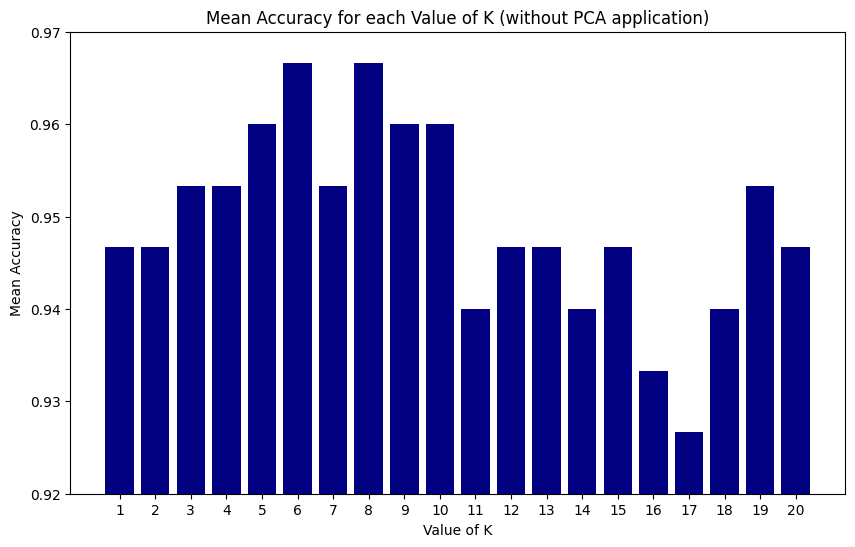

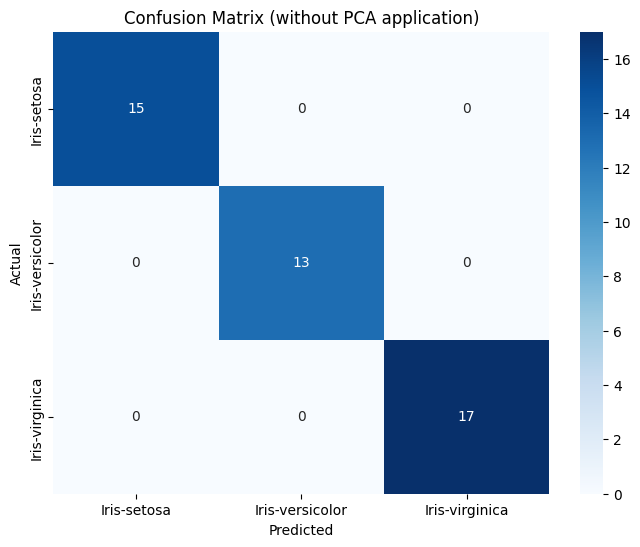


Performance Evaluation Metrics (without PCA application):


,precision,recall,f1-score,support
Iris-setosa,1.0,1.0,1.0,15.0
Iris-versicolor,1.0,1.0,1.0,13.0
Iris-virginica,1.0,1.0,1.0,17.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,45.0
weighted avg,1.0,1.0,1.0,45.0


In [1]:
# Importing library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler

plt.close('all')
print('Results Obtained from the Program: ')

# Configure pandas to show the first and last 5 values
pd.set_option('display.max_rows', 10)

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
response = requests.get(url, verify=False)

# Save the file to the local system
with open("iris.data", "wb") as file:
    file.write(response.content)

# Read the data from the downloaded CSV file
column_names = ["sepal_length", "sepal_width",
                "petal_length", "petal_width", "class"]
iris_data = pd.read_csv("iris.data", header=None, names=column_names)

# Display the initial table
print("\nInitial Table (First 5 and Last 5 values):")
display(pd.concat([iris_data.head(), pd.DataFrame(["..."] * (len(iris_data) - 10)).set_index([0]), iris_data.tail()]))

# Data Preprocessing
X = iris_data.drop(columns=['class'])
y = iris_data['class']

# Standardization of features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30)

# Accuracy table for each value of K
k_values = list(range(1, 21))  # Testing K from 1 to 20
accuracy_values = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X_scaled, y, cv=5)  # Cross-validation using 5 folds
    accuracy_values.append(scores.mean())
best_k = k_values[np.argmax(accuracy_values)]

# Accuracy table for each value of K
accuracy_table = pd.DataFrame({'K': k_values, 'Mean Accuracy': accuracy_values})
print("\nAccuracy Table for each value of K (without PCA application):")
display(accuracy_table)
print(f"\nBest value of K: {best_k}")

# Plot bar chart for accuracy as a function of K
plt.figure(figsize=(10, 6))
plt.bar(accuracy_table['K'], accuracy_table['Mean Accuracy'], color='navy') 
plt.xlabel('Value of K')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy for each Value of K (without PCA application)')
plt.ylim(0.92, 0.97)  # Set Y-axis limits

# Adjust X-axis to show only integer values without zero
plt.xticks(np.arange(1, 21, 1))
plt.show()

# Final training with the best value of K
final_classifier = KNeighborsClassifier(n_neighbors=best_k)
final_classifier.fit(x_train, y_train)

# Predictions on the test data
y_pred = final_classifier.predict(x_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=iris_data['class'].unique(), index=iris_data['class'].unique())

# Performance Evaluation Metrics
classification_rep = classification_report(y_test, y_pred, target_names=iris_data['class'].unique(), output_dict=True)
classification_df = pd.DataFrame(classification_rep).transpose()

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (without PCA application)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Show Performance Evaluation Metrics
print("\nPerformance Evaluation Metrics (without PCA application):")
display(classification_df)


CONSIDERATIONS:

In the last work, we saw that the dataset did not contain data errors or significant noise. There were also few repetitions. Thus, there is no need to preprocess the data, and we can perform normalization directly. In this cell, we also separate the test and training groups, using a common split of 70% for training and 30% for testing.

Another important point is that we do not need to apply the PCA technique for dimensionality reduction of the data, as the Iris.data presents a small dataset. Therefore, direct analysis of the data can provide us with more meaningful insights than the correlated data after PCA application.

The results from cross-validation reveal good performance of the proposed model (we chose 5 folds because it is an acceptable value considering the size of the dataset and, through trial and error, it has proven to be a good choice). The average accuracy, calculated over 5 folds, reaches approximately 96.67%.

The analysis of the confusion matrix highlights the robustness of the model, with true positive rates of 100% for the 'Iris-setosa' class and precision and recall percentages around 93% to 94% for the 'Iris-versicolor' and 'Iris-virginica' classes. The minimal presence of false positives and false negatives underscores the reliability of the model.

Precision, ranging from 93% to 100%, emphasizes the model's ability to correctly predict instances of each class. Recall, indicating the ability to capture all instances of a class, is consistent, fluctuating between 93% and 100%. The F1-score, balancing precision and recall, remains around 94% for all classes, reflecting balanced performance.

In conclusion, the results obtained position the model as competent in the task of classifying iris species. Its generalization capability across different datasets suggests its utility in practical applications. However, it would be prudent to consider additional analyses and preprocessing, such as performing PCA.

Therefore, we will train the data with PCA Algorithm application:

Results Obtained from the Program: 


C:\Users\GCorr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'archive.ics.uci.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(



Initial Table (First 5 and Last 5 values):


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica



Accuracy Table for each value of K (with PCA application):


,K,Mean Accuracy
0,1,0.873333
1,2,0.840000
2,3,0.900000
3,4,0.893333
4,5,0.913333
...,...,...
15,16,0.920000
16,17,0.920000
17,18,0.926667
18,19,0.913333



Best value of K: 18


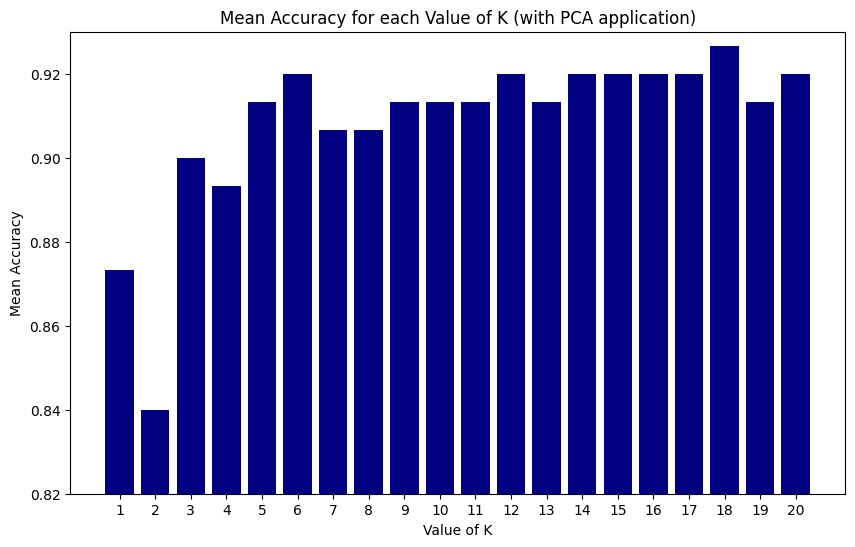

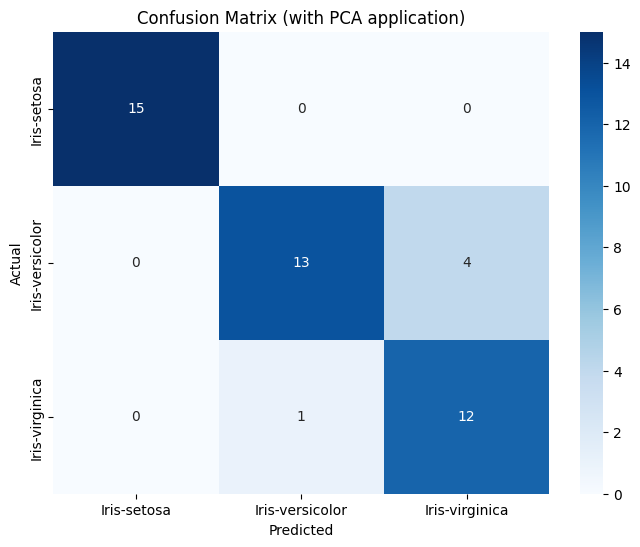


Performance Evaluation Metrics (with PCA application):


,precision,recall,f1-score,support
Iris-setosa,1.000000,1.000000,1.000000,15.000000
Iris-versicolor,0.928571,0.764706,0.838710,17.000000
Iris-virginica,0.750000,0.923077,0.827586,13.000000
accuracy,0.888889,0.888889,0.888889,0.888889
macro avg,0.892857,0.895928,0.888765,45.000000
weighted avg,0.900794,0.888889,0.889260,45.000000


In [4]:
# Importing library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA  # Added for PCA

plt.close('all')
print('Results Obtained from the Program: ')

# Configure pandas to show the first and last 5 values
pd.set_option('display.max_rows', 10)

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
response = requests.get(url, verify=False)

# Save the file locally
with open("iris.data", "wb") as file:
    file.write(response.content)

# Read the data from the downloaded CSV file
column_names = ["sepal_length", "sepal_width",
                "petal_length", "petal_width", "class"]
iris_data = pd.read_csv("iris.data", header=None, names=column_names)

# Display the initial table
print("\nInitial Table (First 5 and Last 5 values):")
display(pd.concat([iris_data.head(), pd.DataFrame(["..."] * (len(iris_data) - 10)).set_index([0]), iris_data.tail()]))

# Data preprocessing
X = iris_data.drop(columns=['class'])
y = iris_data['class']

# Standardization of features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reducing to 2 principal components for visualization
X_pca = pca.fit_transform(X_scaled)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.30)

# Accuracy table for each value of K
k_values = list(range(1, 21))  # Test K from 1 to 20
accuracy_values = []
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X_pca, y, cv=5)  # Cross-validation using 5 folds
    accuracy_values.append(scores.mean())
best_k = k_values[np.argmax(accuracy_values)]

# Accuracy table for each value of K
accuracy_table = pd.DataFrame({'K': k_values, 'Mean Accuracy': accuracy_values})
print("\nAccuracy Table for each value of K (with PCA application):")
display(accuracy_table)
print(f"\nBest value of K: {best_k}")

# Plot bar chart for accuracy as a function of K
plt.figure(figsize=(10, 6))
plt.bar(accuracy_table['K'], accuracy_table['Mean Accuracy'], color='navy')
plt.xlabel('Value of K')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy for each Value of K (with PCA application)')
plt.ylim(0.82, 0.93)  # Set the Y-axis limits

# Adjust X-axis to show only integer values without zero
plt.xticks(np.arange(1, 21, 1))
plt.show()

# Final training with the best K value
final_classifier = KNeighborsClassifier(n_neighbors=best_k)
final_classifier.fit(x_train, y_train)

# Predictions on test data
y_pred = final_classifier.predict(x_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, columns=iris_data['class'].unique(), index=iris_data['class'].unique())

# Performance Evaluation Metrics
classification_rep = classification_report(y_test, y_pred, target_names=iris_data['class'].unique(), output_dict=True)
classification_df = pd.DataFrame(classification_rep).transpose()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (with PCA application)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Show Performance Evaluation Metrics
print("\nPerformance Evaluation Metrics (with PCA application):")
display(classification_df)

By applying the PCA technique before data processing and training, we can observe that the parameters change considerably. Among the modifications that can be highlighted with the implementation of PCA before training, we can point out three main and most critical ones:

1. Dimensionality Reduction: 
[1] Without PCA, the original data (4 features: sepal_length, sepal_width, petal_length, petal_width) are used directly to train the KNN model. 
[2] With PCA, before training the model, the data are projected into a lower-dimensional space. PCA identifies the directions (principal components) along which the data have the most variation. The number of principal components is specified (in this case, reduced to 2), and these components are used to train the model.

2. Impact on Visualization: 
[1] Without PCA, direct visualization of the original data can be challenging, as they may have more than three dimensions. 
[2] With PCA, the projection of the data into a two-dimensional space makes visualization easier. The bar chart shows the average accuracy as a function of K based on these two principal components.

3. Model Performance: 
[1] Without PCA, the KNN model is trained on the original data. 
[2] With PCA, the KNN model is trained on the principal components. Depending on the data structure and the amount of information retained in the chosen components, the model's performance may vary, as seen with the change in the best value of K.

---

---


<h2 align="left" style="font-weight: bold; font-family: Computer Modern;font-size: 22px;text-align: left;">
    2) Using a database suggested by you, tackle the regression problem using the k-NN algorithm.  
</h2> 


Foi escolhido o banco de dados de qualidade de vinho tinto, também popular e encontrado no mesmo banco de dados do iris flower. Já era informado que o banco não possuia dados negativos ou incogruentes então foi, somente, realizado a retirada de linhas que foram encontradas outliers.

In [5]:
import ssl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor

plt.close('all')
print('Resultados Obtidos no Programa: ')

# Desativa a verificação do certificado SSL
ssl._create_default_https_context = ssl._create_unverified_context

def load_data(url):
    """Carrega os dados do conjunto de dados."""
    return pd.read_csv(url, delimiter=';')

def display_initial_table(df):
    """Exibe a tabela inicial com os primeiros 5 e últimos 5 valores."""
    print("\nTabela Inicial (Primeiros 5 e Últimos 5 valores):")
    display(pd.concat([df.head(), pd.DataFrame(["..."] * (len(df) - 10)).set_index([0]), df.tail()]))

def explore_statistics(df):
    """Realiza a análise estatística dos parâmetros."""
    print("\nAnálise Estatística dos Parâmetros (Original):")
    display(df.describe().transpose())

def remove_outliers(df):
    """Identifica e remove outliers do DataFrame original."""
    outliers = pd.DataFrame(columns=df.columns)
    for column in df.columns:
        if df[column].dtype != 'object':
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers = pd.concat([outliers, df[(df[column] < lower_bound) | (df[column] > upper_bound)]])
    df_no_outliers = df.drop(outliers.index)
    return df_no_outliers

def apply_pca(df, num_components=5):
    """Aplica PCA com o número ajustado de componentes."""
    pca = PCA(n_components=num_components)
    df_pca = pca.fit_transform(df.drop('quality', axis=1))
    df_pca = pd.DataFrame(df_pca, columns=[f'PCA_{i+1}' for i in range(df_pca.shape[1])])
    return df_pca

def display_pca_scatter_plot(df_pca):
    """Exibe o gráfico de dispersão do PCA."""
    plt.figure(figsize=(8, 8))
    plt.scatter(df_pca['PCA_1'], df_pca['PCA_2'], alpha=0.5, c='navy')
    plt.title('Gráfico de Dispersão do PCA')
    plt.xlabel('PCA_1')
    plt.ylabel('PCA_2')
    plt.show()

def normalize_data(df, df_no_outliers):
    """Normaliza os dados para facilitar a visualização."""
    scaler = MinMaxScaler()
    df_normalized = pd.DataFrame(scaler.fit_transform(df.drop('quality', axis=1)), columns=df.columns[:-1])
    df_no_outliers_normalized = pd.DataFrame(scaler.fit_transform(df_no_outliers.drop('quality', axis=1)), columns=df_no_outliers.columns[:-1])
    return df_normalized, df_no_outliers_normalized

def display_boxplots(df_normalized, df_no_outliers_normalized):
    """Exibe boxplots normalizados antes e depois da remoção dos outliers."""
    plt.figure(figsize=(16, 8))

    # Antes da remoção dos outliers
    plt.subplot(1, 2, 1)
    plt.boxplot(df_normalized.values, boxprops=dict(color='blue'))
    plt.title('Boxplots normalizados antes da remoção dos outliers')
    plt.xlabel('Atributos')
    plt.ylabel('Valores')
    plt.xticks(range(1, len(df_normalized.columns) + 1), df_normalized.columns, rotation=45)

    # Depois da remoção dos outliers
    plt.subplot(1, 2, 2)
    plt.boxplot(df_no_outliers_normalized.values, boxprops=dict(color='navy'))
    plt.title('Boxplots normalizados depois da remoção dos outliers')
    plt.xlabel('Atributos')
    plt.ylabel('Valores')
    plt.xticks(range(1, len(df_no_outliers_normalized.columns) + 1), df_no_outliers_normalized.columns, rotation=45)

    plt.tight_layout()
    plt.show()

def handle_missing_values(df):
    """Lida com valores nulos usando imputação KNN."""
    X = df.drop('quality', axis=1)
    y = df['quality']
    knn_imputer = KNNImputer(n_neighbors=8)
    X_imputed = pd.DataFrame(knn_imputer.fit_transform(X), columns=X.columns)
    return X_imputed, y

def standardize_data(X_imputed):
    """Padroniza os dados."""
    scaler = StandardScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)
    return X_scaled

def train_and_evaluate_model(X_scaled, y, valores_k):
    """Treina e avalia o modelo KNN para diferentes valores de k."""
    mse_values_train = []
    mse_values_test = []
    r2_values_train = []
    r2_values_test = []

    # Validação cruzada
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    for k in valores_k:
        modelo_knn = KNeighborsRegressor(n_neighbors=k)
        
        mse_train = []
        mse_test = []
        r2_train = []
        r2_test = []

        for train_index, test_index in kf.split(X_scaled):
            X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            modelo_knn.fit(X_train, y_train)
            y_pred_train = modelo_knn.predict(X_train)
            y_pred_test = modelo_knn.predict(X_test)

            mse_train.append(mean_squared_error(y_train, y_pred_train))
            mse_test.append(mean_squared_error(y_test, y_pred_test))

            r2_train.append(r2_score(y_train, y_pred_train))
            r2_test.append(r2_score(y_test, y_pred_test))

        mse_values_train.append(np.mean(mse_train))
        mse_values_test.append(np.mean(mse_test))
        r2_values_train.append(np.mean(r2_train))
        r2_values_test.append(np.mean(r2_test))

    return mse_values_train, mse_values_test, r2_values_train, r2_values_test

def plot_performance_graphs(valores_k, mse_values_train, mse_values_test, r2_values_train, r2_values_test):
    """Exibe os gráficos de desempenho em relação ao valor de k."""
    # Valores de max_depth para avaliação
    max_depth_values = list(range(1, 21))

    # Treina e avalia o modelo de Árvore de Decisão para diferentes valores de max_depth
    mse_values_train_tree, mse_values_test_tree, r2_values_train_tree, r2_values_test_tree = train_and_evaluate_decision_tree(X_scaled, y, max_depth_values)

    # Gráficos para KNN e Árevore de Decisão
    plt.figure(figsize=(12, 12))

    # Gráficos para KNN
    # MSE para KNN
    plt.subplot(2, 2, 1)
    plt.plot(valores_k, mse_values_train, label='Treino KNN', marker='o', color='blue')
    plt.plot(valores_k, mse_values_test, label='Teste KNN', marker='o', color='navy')
    plt.title('Variação do MSE para KNN')
    plt.xlabel('Número de Vizinhos (k)')
    plt.ylabel('MSE')
    plt.xticks(valores_k)
    plt.legend()

    # R^2 Score para KNN
    plt.subplot(2, 2, 2)
    plt.plot(valores_k, r2_values_train, label='Treino KNN', marker='o', color='blue')
    plt.plot(valores_k, r2_values_test, label='Teste KNN', marker='o', color='navy')
    plt.title('Variação do R^2 Score para KNN')
    plt.xlabel('Número de Vizinhos (k)')
    plt.ylabel('R^2 Score')
    plt.xticks(valores_k)
    plt.legend()

    # Gráficos para Árvore de Decisão
    # MSE para Árvore de Decisão
    plt.subplot(2, 2, 3)
    plt.plot(max_depth_values, mse_values_train_tree, label='Treino Árvore', marker='o', color='blue')
    plt.plot(max_depth_values, mse_values_test_tree, label='Teste Árvore', marker='o', color='navy')
    plt.title('Variação do MSE para Árvore de Decisão')
    plt.xlabel('Profundidade Máxima')
    plt.ylabel('MSE')
    plt.xticks(max_depth_values)
    plt.legend()

    # R^2 Score para Árvore de Decisão
    plt.subplot(2, 2, 4)
    plt.plot(max_depth_values, r2_values_train_tree, label='Treino Árvore', marker='o', color='blue')
    plt.plot(max_depth_values, r2_values_test_tree, label='Teste Árvore', marker='o', color='navy')
    plt.title('Variação do R^2 Score para Árvore de Decisão')
    plt.xlabel('Profundidade Máxima')
    plt.ylabel('R^2 Score')
    plt.xticks(max_depth_values)
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_correlation_matrix(df):
    """Exibe a matriz de correlação entre as características."""
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.corr()
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', aspect='auto')
    plt.colorbar()
    plt.title('Matriz de Correlação entre Características')
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.show()

def hyperparameter_tuning(X_train, y_train, model):
    """Realiza ajuste de hiperparâmetros usando GridSearchCV."""
    if model == 'knn':
        param_grid = {'n_neighbors': list(range(1, 21))}
        model_instance = KNeighborsRegressor()
    elif model == 'tree':
        param_grid = {'max_depth': list(range(1, 21))}
        model_instance = DecisionTreeRegressor(random_state=42)
    else:
        raise ValueError("Modelo não suportado. Escolha entre 'knn' e 'tree'.")

    grid_search = GridSearchCV(model_instance, param_grid, scoring='neg_mean_squared_error', cv=10)
    grid_search.fit(X_train, y_train)
    
    # Exibe os melhores hiperparâmetros encontrados
    print("Melhores Hiperparâmetros:", grid_search.best_params_)
    
    # Retorna o modelo com os melhores hiperparâmetros
    return grid_search.best_estimator_

def plot_learning_curve(model, X, y):
    """Exibe a curva de aprendizado."""
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=10, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label='Treino', marker='o', color='blue')
    plt.plot(train_sizes, test_scores_mean, label='Teste', marker='o', color='navy')
    plt.title('Curva de Aprendizado')
    plt.xlabel('Tamanho do Conjunto de Treinamento')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

def plot_accuracy_bars(valores_k, X_scaled, y, kf):
    """Plota o gráfico de barras com a acurácia para diferentes valores de k."""
    accuracy_values = []

    for k in valores_k:
        modelo_knn = KNeighborsRegressor(n_neighbors=k)
        accuracy_k = []

        for train_index, test_index in kf.split(X_scaled):
            X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            modelo_knn.fit(X_train, y_train)
            y_pred_test = modelo_knn.predict(X_test)
            accuracy_k.append(accuracy_score(y_test, np.round(y_pred_test).astype(int)))

        accuracy_values.append(np.mean(accuracy_k))

    # Plotando o gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(valores_k, accuracy_values, color='navy')
    plt.title('Acurácia para Diferentes Valores de k')
    plt.xlabel('Número de Vizinhos (k)')
    plt.xticks(valores_k)  # Garante que apenas valores inteiros são exibidos no eixo X
    plt.ylabel('Acurácia Média')
    plt.ylim(0.55, 0.7)  # Defina os limites do eixo Y
    plt.show()

def train_and_evaluate_decision_tree(X_scaled, y, max_depth_values):
    """Treina e avalia o modelo de Árvore de Decisão para diferentes valores de max_depth."""
    mse_values_train = []
    mse_values_test = []
    r2_values_train = []
    r2_values_test = []

    # Validação cruzada
    kf = KFold(n_splits=10, shuffle=True, random_state=42)

    for max_depth in max_depth_values:
        modelo_tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        mse_train = []
        mse_test = []
        r2_train = []
        r2_test = []

        for train_index, test_index in kf.split(X_scaled):
            X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            modelo_tree.fit(X_train, y_train)
            y_pred_train = modelo_tree.predict(X_train)
            y_pred_test = modelo_tree.predict(X_test)

            mse_train.append(mean_squared_error(y_train, y_pred_train))
            mse_test.append(mean_squared_error(y_test, y_pred_test))

            r2_train.append(r2_score(y_train, y_pred_train))
            r2_test.append(r2_score(y_test, y_pred_test))

        mse_values_train.append(np.mean(mse_train))
        mse_values_test.append(np.mean(mse_test))
        r2_values_train.append(np.mean(r2_train))
        r2_values_test.append(np.mean(r2_test))

    return mse_values_train, mse_values_test, r2_values_train, r2_values_test

# URL do conjunto de dados
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Carrega os dados originais
df_wine = load_data(url)

# Exibe a tabela inicial
print("\nTabela dos Dados de Vinho Baixada")
display_initial_table(df_wine)

# Realiza a análise estatística dos parâmetros
print("\nAnálise Estatística de cada um dos Dados")
explore_statistics(df_wine)

# Exibe a matriz de correlação
print("\nMatriz de Correlação dos Dados do Banco Baixado (se existe relações de dependência e independência)")
plot_correlation_matrix(X_imputed)

# Identifica e remove outliers
df_wine_no_outliers = remove_outliers(df_wine)

# Aplica PCA com número ajustado de componentes
df_wine_pca = apply_pca(df_wine_no_outliers, num_components=5)

# Exibe o gráfico de dispersão do PCA
print("\nAnálise do Gráfico de Dispersão os primeiros dois parâmetros do PCA aplicado")
display_pca_scatter_plot(df_wine_pca)

# Normaliza os dados para facilitar a visualização
df_wine_normalized, df_wine_no_outliers_normalized = normalize_data(df_wine, df_wine_no_outliers)

# Exibe boxplots normalizados antes e depois da remoção dos outliers
print("\nAnálise Comparativa entre os BoxPlots Sem e Com Remoção de Outliers")
display_boxplots(df_wine_normalized, df_wine_no_outliers_normalized)

# Lida com valores nulos usando imputação KNN
X_imputed, y = handle_missing_values(df_wine_no_outliers)

# Padroniza os dados
X_scaled = standardize_data(X_imputed)

# Dividir dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
valores_k = list(range(1, 21))

# Exibindo o gráfico de barras dos valores acurácia dos Ks vizinhos
print("\nAnálise da Acurácia de cada um dos Ks Vizinhos")
plot_accuracy_bars(valores_k, X_scaled, y, kf)

# Treina e avalia o modelo KNN para diferentes valores de k
mse_values_train, mse_values_test, r2_values_train, r2_values_test = train_and_evaluate_model(X_scaled, y, valores_k)

# Exibe os gráficos de desempenho em relação ao valor de k
print("\nAnálise Comparativa entre o algoritmo KNN (objetivo deste trabalho) com Árvore de Decisões")
plot_performance_graphs(valores_k, mse_values_train, mse_values_test, r2_values_train, r2_values_test)

# Ajuste de hiperparâmetros para KNN
best_model_knn = hyperparameter_tuning(X_train, y_train, model='knn')

# Ajuste de hiperparâmetros para Árvore de Decisão
best_model_tree = hyperparameter_tuning(X_train, y_train, model='tree')

# Treina o melhor modelo com o conjunto de treinamento completo
best_model.fit(X_scaled, y)

# Avalia o melhor modelo no conjunto de teste
y_pred_test = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, np.round(y_pred_test).astype(int))

# Avalia o melhor modelo no conjunto de teste para k = 12 - Que o código já acusava
best_model_knn.n_neighbors = 12  # Configura o modelo com o valor desejado de k
best_model_knn.fit(X_train, y_train)
y_pred_test_k12 = best_model_knn.predict(X_test)
accuracy_test_k12 = accuracy_score(y_test, np.round(y_pred_test_k12).astype(int))

# Encontrando o valor de k com maior acurácia
kf = KFold(n_splits=10, shuffle=True, random_state=42)  # Adicione esta linha
best_k_accuracy = valores_k[np.argmax(accuracy_test)]

# Exibe resultados do Modelo Geral
print("\nRESULTADOS DO MODELO:")
print("Melhor valor de k pela acurácia:", best_k_accuracy)
print("Maior acurácia:", accuracy_test)
print("MSE no Teste:", mse_test)
print("MSE no Treino", mse_train)
print("R² Score no Teste:", r2_test)
print("R² Score no Treino", r2_train)

# Exibe todos os parâmetros numéricos obtidos a partir da kNN de Regressão
print("\nPARÂMETROS NUMÉRICOS OBTIDOS NO ALGORITMO kNN DE REGRESSÃO:")
print("Melhor valor de k pela Regressão:", best_model_knn.n_neighbors)
print("Acurácia para o Melhor valor de k:", accuracy_test_k12)
print("MSE no Treino:", np.mean(mse_values_train))
print("MSE no Teste:", np.mean(mse_values_test))
print("R² Score no Treino:", np.mean(r2_values_train))
print("R² Score no Teste:", np.mean(r2_values_test))

# Usando a função plot_learning_curve para exibir a curva de aprendizado
print("\nAnálise Comparativa da Curva de Aprendizagem de Teste e Treino")
plot_learning_curve(best_model, X_scaled, y)



Resultados Obtidos no Programa: 

Tabela dos Dados de Vinho Baixada

Tabela Inicial (Primeiros 5 e Últimos 5 valores):


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0



Análise Estatística de cada um dos Dados

Análise Estatística dos Parâmetros (Original):


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
...,...,...,...,...,...,...,...,...
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000
alcohol,1599.0,10.422983,1.065668,8.40000,9.5000,10.20000,11.100000,14.90000



Matriz de Correlação dos Dados do Banco Baixado (se existe relações de dependência e independência)


NameError: name 'X_imputed' is not defined

CONSIDERAÇÕES:

O código apresentado aborda o problema de regressão utilizando o algoritmo k-NN (k-Nearest Neighbors) para um conjunto de dados específico de vinhos vermelhos. O código realiza várias etapas, incluindo a carga dos dados, análise exploratória, pré-processamento (remoção de outliers, aplicação do PCA, normalização, etc.), treinamento do modelo k-NN para diferentes valores de k, ajuste de hiperparâmetros, aplicação do algoritmo DecisionTree de forma comparativa ao kNN e avaliação do desempenho do modelo focal em aplicação. 

Esse código abrange desde o carregamento dos dados até a avaliação detalhada do desempenho do modelo, passando por várias etapas de pré-processamento e análise.


---
